# feature 한개에 대한 제품 순위

In [1]:
A -> A weight=PS(A)/NS(A)
B -> B weight=PS(B)
C -> C weight=PS(C)
D -> D weight=PS(D)

A -> B weight=PC(B, A)
C -> B weight=PC(B, C)/NC(B, C)
D -> B weight=PC(B, D)
C- > A weight=PC(A, C)
PS(A) = 1,NS(A) = 3,PS(B) = 2, PSf (C) = 3, PSf(D) = 4
PCf(B, A) = 3, PCf (B, C) = 7 PCf (B, D) = 3, PCf(A, C) = 2, NCf (B, C) = 2
import pandas as pd
import numpy as np
import math
products=['A','B','C','D']
weighted_edge = np.zeros((len(products),len(products)),dtype=np.float32)
score = np.zeros(len(products),dtype=np.float32)
window_size = 3
covered_coocurrences = []

for i in range(0,len(products)):
    for j in range(0,len(products)):
        if j==i:
            matrix[i,j]=PS(pi)/NS(pi)
        else:
            matrix[i,j]=PC(pj, pi)/NC(pj, pi)
return rank(matrix)
            
            for window_start in range(0,(len(processed_text)-window_size+1)):
                window_end = window_start+window_size
                window = processed_text[window_start:window_end]
              # 탐색하고 있는 두 단어가 윈도(window)에 동시 등장할 경우
                if (products[i] in window) and (products[j] in window):
                    index_of_i = window_start + window.index(products[i])
                    index_of_j = window_start + window.index(products[j])
                    
                    if [index_of_i,index_of_j] not in covered_coocurrences:
                        weighted_edge[i][j]=1
                        covered_coocurrences.append([index_of_i,index_of_j])
MAX_ITERATIONS = 50
d=0.85
threshold = 0.0001 

for iter in range(0,MAX_ITERATIONS):
    prev_score = np.copy(score)
    
    for i in range(0,vocab_len):
        
        summation = 0
        for j in range(0,vocab_len):
            if weighted_edge[j][i] != 0:
                #print("{},{} = {}".format(j,i,weighted_edge[j][i]))
                summation += weighted_edge[j][i]*score[j]
                
        score[i] = (1-d) + d*(summation)
    
    if np.sum(np.fabs(prev_score-score)) <= threshold: #convergence condition
        break



for i in range(0,10) : 
    print("Score of "+products[i]+": "+str(score[i]))
    
print("Ranking:\n")
sorted_index = np.flip(np.argsort(score),0)
num = 10
for i in range(0,num):
    print(str(products[sorted_index[i]])+" : " + str(score[sorted_index[i]]))                      

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [24]:
from pandas import DataFrame as df
df1=df(data={'product':['A','A','B','C','D'],'sentence':['ss','ss','ss','ss','cs'],'target':['A','A','B','B',"B"],'label':['Pos','Pos',"Neg","Neg","Neg"],'n':[1,1,1,1,1]})

In [33]:
df1

,product,sentence,target,label,n
0,A,ss,A,Pos,1
1,B,ss,B,Neg,1
2,C,ss,B,Neg,1
3,D,cs,B,Neg,1


In [32]:
df1=df1.groupby(['product','sentence','target','label'],as_index=False).count().sort_values('n')

In [34]:
nodes=set(df1['product'])
edges=[]
edges1=[]
for i in range(3):
    edges.append((df1['product'][i],df1['target'][i],df1['n'][i]/df1['n'][i+1]))
print(edges)       


[('A', 'A', 1.0), ('B', 'B', 1.0), ('C', 'B', 1.0)]


In [35]:
len(df1.groupby(['product','sentence','target','label']).count().sort_values('n'))

4

In [36]:
import networkx as nx

nodes=set(df1['product'])
edges=[]
edges1=[]
for i in range(3):
    edges.append((df1['product'][i],df1['target'][i],df1['n'][i]/df1['n'][i+1]))
print(edges) 
  
graph=nx.DiGraph()
graph.add_nodes_from(nodes)
graph.add_weighted_edges_from(edges)

nx.pagerank(graph) 

# nx.draw(graph)

[('A', 'A', 1.0), ('B', 'B', 1.0), ('C', 'B', 1.0)]


{'B': 0.5873012892792653,
 'A': 0.31746025785585297,
 'C': 0.04761922643244094,
 'D': 0.04761922643244094}

# feature 1개에 대해서임/

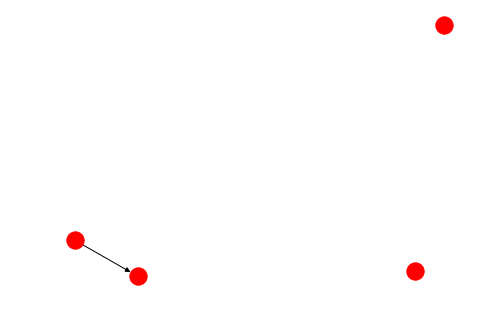

In [37]:
 nx.draw(graph)